- Attributes of arrays: Determining the size, shape, memory consumption, and data types of arrays
    
- Indexing of arrays: Getting and setting the value of individual array elements
 
- Slicing of arrays: Getting and setting smaller subarrays within a larger array
    
- Reshaping of arrays: Changing the shape of a given array
    
- Joining and splitting of arrays: Combining multiple arrays into one, and splitting one array into many

# NumPy Array Attributes

In [1]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [2]:
x1

array([5, 0, 3, 3, 7, 9])

In [3]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [4]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array):

In [5]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [6]:
print("dtype:", x3.dtype)

dtype: int32


In [7]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


# Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar. In a one-dimensional array, the ith value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [8]:
x1

array([5, 0, 3, 3, 7, 9])

In [9]:
x1[0]

5

In [10]:
x1[5]

9

In [11]:
x1[10]

IndexError: index 10 is out of bounds for axis 0 with size 6

In [17]:
# both list and array will give out og index error if we are out of index from the list or array

In [18]:
x1[-4]

3

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:



In [19]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [20]:
x2[0,0]

3

In [23]:
x2[2,2]

7

In [24]:
x2[-1,-1]

7

Values can also be modified using any of the above index notation:



In [25]:
x2[0,0]=10
x2

array([[10,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type. This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

In [26]:
x2[0]=3.14334
x2

array([[3, 3, 3, 3],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

# Array Slicing: Accessing Subarrays¶


Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon (:) character. The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array x, use this:

x[start:stop:step]

If any of these are unspecified, they default to the values start=0, stop=size of dimension, step=1. We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

In [31]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
x[:5]

array([0, 1, 2, 3, 4])

In [29]:
x[5:]

array([5, 6, 7, 8, 9])

In [30]:
x[4:7]

array([4, 5, 6])

In [32]:
x[::2]

array([0, 2, 4, 6, 8])

In [33]:
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

# Multi-dimensional subarrays¶


In [34]:
x2

array([[3, 3, 3, 3],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [35]:
x2[:2,:3]

array([[3, 3, 3],
       [7, 6, 8]])

In [36]:
x2[::-1, ::-1]

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [3, 3, 3, 3]])

# Accessing array rows and columns¶


In [37]:
x2[:,0]

array([3, 7, 1])

In [38]:
x2[0,:]

array([3, 3, 3, 3])

# Subarrays as no-copy views¶


One important–and extremely useful–thing to know about array slices is that they return views rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. Consider our two-dimensional array from before:

In [39]:
x2

array([[3, 3, 3, 3],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [40]:
x2_sub=x2[:2,:2]
print(x2_sub)

[[3 3]
 [7 6]]


Now if we modify this subarray, we'll see that the original array is changed! Observe:



In [41]:
x2_sub[0,0]=100
print(x2_sub)

[[100   3]
 [  7   6]]


In [42]:
x2

array([[100,   3,   3,   3],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

# Creating copies of arrays¶


In [43]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[100   3]
 [  7   6]]


In [44]:
# If we now modify this subarray, the original array is not touched:

x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  3]
 [ 7  6]]


In [45]:
print(x2)


[[100   3   3   3]
 [  7   6   8   8]
 [  1   6   7   7]]


# Reshaping of Arrays¶


Another useful type of operation is reshaping of arrays. The most flexible way of doing this is with the reshape method. For example, if you want to put the numbers 1 through 9 in a 3×3 grid

In [46]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [47]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [48]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

# Array Concatenation and Splitting¶


Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines np.concatenate, np.vstack, and np.hstack. np.concatenate takes a tuple or list of arrays as its first argument

In [49]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [50]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [51]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [52]:
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [53]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack (vertical stack) and np.hstack (horizontal stack) functions:

In [54]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [59]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Similary, np.dstack will stack arrays along the third axis.



# Splitting of arrays¶


array_split() for splitting arrays, we pass it the array we want to split and the number of splits.

We also have the method split() available but it will not adjust the elements when elements amre less in source array for splitting like in example above, array_split() worked properly but split() would fail.

In [61]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [65]:
x1,x2=np.split(x,[2,3])

ValueError: too many values to unpack (expected 2)

Notice that N split-points, leads to N + 1 subarrays. The related functions np.hsplit and np.vsplit are similar:

In [66]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[9 8 7]
 [6 5 4]]
[]


In [67]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[9 8]
 [6 5]]
[[7]
 [4]]


Similarly, np.dsplit will split arrays along the third axis.



In [3]:
# One-Dimensional List to Array
import pandas as pd
import numpy as np
data = [11, 22, 33, 44, 55]
array=np.array(data)

In [5]:
array

array([11, 22, 33, 44, 55])

In [6]:
# Two-Dimensional List of Lists to Array
# list of data
data = [[11, 22],
        [33, 44],
        [55, 66]]
np.array(data)

array([[11, 22],
       [33, 44],
       [55, 66]])

## What is Numpy?

- NumPy stands for ‘Numerical Python.’ It is a basic scientific library used in statistical functions, linear algebra, arithmetic operations, bitwise operations, etc.

- It is basically the core library for scientific computing, which contains a powerful n-dimensional array object.

## Why NumPy arrays?

- A numpy array is a powerful N-dimensional array object which is in the form of rows and columns.

- Numpy can be put to use for storing, manipulation, and deletion of array elements. We can use it for sorting, indexing, and stacking of the array elements.

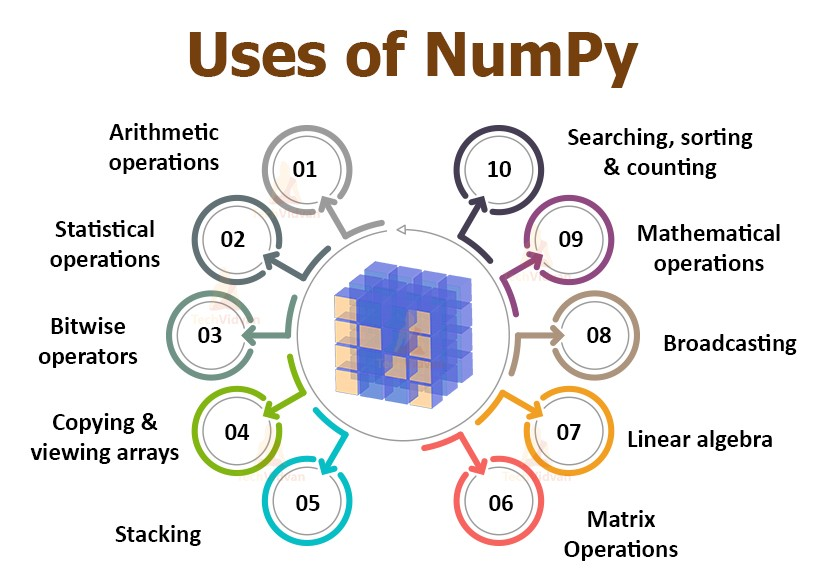

- An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size. The number of dimensions and items in an array is defined by its shape, which is a tuple of N non-negative integers that specify the sizes of each dimension. The type of items in the array is specified by a separate data-type object (dtype), one of which is associated with each ndarray.

- The most important attributes of ndarray objects are:

- ndarray.ndim is the number of dimensions (more often called “axes”) of the array.

- ndarray.shape is the size of the array. It is a tuple of natural numbers showing the length of the array along each axis. For a matrix of n rows and m columns, the shape would be (n, m). The number of elements of the shape tuple is ndim.

- ndarray.size is the number of elements in the array which is n*m from the array shape.

- ndarray.dtype is an object describing the type of array elements. You can define dtype using standard Python data types. NumPy here provides a whole bunch of possibilities, both built-in, for example, bool_, character, int8, int16, int32, int64, float8, float16, float32, float64, complex64, object_, and the ability to define your own data types, including composite ones.

- ndarray.itemsize is the size of each element in the array in bytes.

- ndarray.data is a buffer containing the actual elements of the array. Usually, this attribute is not used much as the easiest way to access array elements is using indices.

## Views and copies:

- The main difference between a copy and a view of an array is that the copy is a new array, and the view is just a view of the original array.

The copy returns None.
The view returns the original array.

# Linear Algebra with NumPy.


In [7]:
import numpy as np
 
A = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])
 
# Rank of a matrix
print("Rank of A:", np.linalg.matrix_rank(A))
 
# Trace of matrix A
print("\nTrace of A:", np.trace(A))
 
# Determinant of a matrix
print("\nDeterminant of A:", np.linalg.det(A))
 
# Inverse of matrix A
print("\nInverse of A:\n", np.linalg.inv(A))
 
print("\nMatrix A raised to power 3:\n",
           np.linalg.matrix_power(A, 3))

Rank of A: 3

Trace of A: 11

Determinant of A: -306.0

Inverse of A:
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]

Matrix A raised to power 3:
 [[336 162 228]
 [406 162 469]
 [698 702 905]]


- In linear algebra, the trace of a square matrix A, denoted tr(A), is defined to be the sum of elements on the main diagonal (from the upper left to the lower right)

- The maximum number of its linearly independent columns (or rows ) of a matrix is called the rank of a matrix. The rank of a matrix cannot exceed the number of its rows or columns

In [13]:
import numpy as np
import timeit
# vectorized sum
print(np.sum(np.arange(15000)))
print("Time taken by vectorized sum : ", end = "")
%timeit np.sum(np.arange(15000))

112492500
Time taken by vectorized sum : 54.7 µs ± 391 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


https://towardsdatascience.com/scientific-computing-with-python-daaaaddfa122